<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/05.2-Use_Operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install imgaug==0.2.5
!pip install pylatexenc

In [ ]:

#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html
* https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html


## Use Operators
Operator class is used in qiskit to represent matrix operations acting on a quantum system

It has several methods to compose and and build new operators


### Creating it from an array

In [3]:
#Using a matrix to create the Operator
import numpy as np
from qiskit.quantum_info import Operator

XPauli_matrix = np.array([[0,1],[1,0]])
xop = Operator(XPauli_matrix)

print("XPauli operator:")
xop.data

XPauli operator:


array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

### Creating it from a Pauli gate object

In [ ]:
#Using a Pauli object to initialize the Operator
from qiskit.quantum_info.operators import Operator, Pauli

op = Operator(Pauli('X'))
op.data

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

### Creating it from gates in qiskit.circuit.library

In [4]:
#Using a gate to initialize the Operator
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import RXGate

xop = Operator(RXGate(np.pi))
xop.data

array([[6.123234e-17+0.j, 0.000000e+00-1.j],
       [0.000000e+00-1.j, 6.123234e-17+0.j]])

### Creating it from a Statevector

In [ ]:
#Using a QuantumCircuit to initialize the Operator
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
sv = Statevector.from_instruction(qc)

opBell = Operator(sv)

print(f"Operator is unitary: {opBell.is_unitary()}")
print(f"Operador is equivalent to the statevector: {opBell.equiv(sv)}")

Operator is unitary: False
Operador is equivalent to the statevector: True


### Creating it from a QuantumCircuit

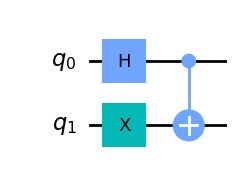

array([[ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j]])

In [7]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cnot(0,1)
display(qc.draw("mpl"))

op = Operator(qc)
op.to_matrix()

### Applying the Operator into a Circuit

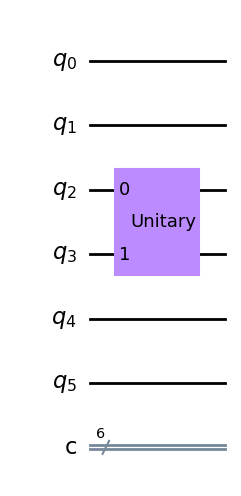

In [ ]:
#Using Operator in a circuit
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector

#Build the Operator
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0,1)
belLOp = Operator(bell)

#Using the operator in the circuit (using the append)
qc2 = QuantumCircuit(6)
qc2.append(belLOp, [2,3])
qc2.draw()

### Using Tensor product with operator

In [ ]:
# Using a X operator to have a XX operator
import numpy as np
from qiskit.quantum_info.operators import Operator

XPauli_matrix = np.array([[0, 1],[1, 0]])
xop = Operator(XPauli_matrix)
xxop = xop.tensor(xop)
print("XX-Pauli operator:")
xxop.data

XX-Pauli operator:


array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

### Composing Operators together

In [8]:
#Composing operators
h_matrix=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
hop = Operator(h_matrix)
print("Hadamard operator:")
print(hop.data)
print()

print("Composing two Hadamard gates (returns the Identity)")
iop = hop.compose(hop) #the caller hop goes first and the parameter hop is second on the composition
iop

Hadamard operator:
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]

Composing two Hadamard gates (returns the Identity)


Operator([[ 1.00000000e+00+0.j, -2.23711432e-17+0.j],
          [-2.23711432e-17+0.j,  1.00000000e+00+0.j]],
         input_dims=(2,), output_dims=(2,))

### Composing operator with a matrix

In [ ]:
#Compose can be used directly in a matrix
from qiskit.quantum_info.operators import Operator

h_matrix=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
hop = Operator(h_matrix)

print(f"Operator Hadamard:\n{hop.data}")

hopcomp = hop.compose(h_matrix)
print(f"\nComposed operator using matrix:\n{hopcomp.data}")

Operator Hadamard:
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]

Composed operator using matrix:
[[ 1.00000000e+00+0.j -2.23711432e-17+0.j]
 [-2.23711432e-17+0.j  1.00000000e+00+0.j]]


In [2]:
import qiskit.tools.jupyter
%qiskit_version_table